importing Jupyter notebook from new_topology.ipynb
importing Jupyter notebook from conductor_calculation.ipynb
importing Jupyter notebook from ipynb_importer.ipynb
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
牵引变压器的数量=1
AT变压器的数量=3
上下行并联线的数量=3
e1与ra1连接线的数量=62
e1与g连接线的数量=62
e2与g连接线的数量=62
ra1与g连接线的数量=62
ra3与g连接线的数量=62
机车的数量=1
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
牵引变压器的数量=1
AT变压器的数量=3
上下行并联线的数量=3
e1与ra1连接线的数量=62
e1与g连接线的数量=62
e2与g连接线的数量=62
ra1与g连接线的数量=62
ra3与g连接线的数量=62
机车的数量=1
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
牵引变压器的数量=1
AT变压器的数量=3
上下行并联线的数量=3
e1与ra1连接线的数量=62
e1与g连接线的数量=62
e2与g连接线的数量=62
ra1与g连接线的数量=62
ra3与g连接线的数量=62
机车的数量=1
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
牵引变压器的数量=1
AT变压器的数量=3
上下行并联线的数量=3
e1与ra1连接线的数量=62
e1与g连接线的数量=62
e2与g连接线的数量=62
ra1与g连接线的数量=62
ra3与g连接线的数量=62
机车的数量=1
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
牵引变压器的数量=1
AT变压器的数量=3
上下行并联线的数量=3
e1与ra1连接线的数量=62
e1与g连接线的数量=62
e2与g连接线的数量=62
ra1与g连接线的数量=62
ra3与g连接线的数量=62
机车的数

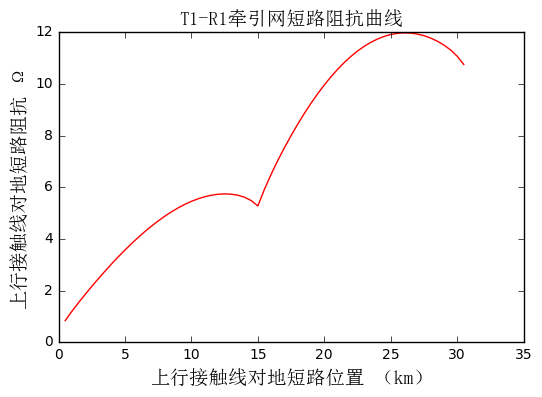

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
牵引变压器的数量=1
AT变压器的数量=3
上下行并联线的数量=3
e1与ra1连接线的数量=62
e1与g连接线的数量=62
e2与g连接线的数量=62
ra1与g连接线的数量=62
ra3与g连接线的数量=62
机车的数量=1
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
牵引变压器的数量=1
AT变压器的数量=3
上下行并联线的数量=3
e1与ra1连接线的数量=62
e1与g连接线的数量=62
e2与g连接线的数量=62
ra1与g连接线的数量=62
ra3与g连接线的数量=62
机车的数量=1
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
牵引变压器的数量=1
AT变压器的数量=3
上下行并联线的数量=3
e1与ra1连接线的数量=62
e1与g连接线的数量=62
e2与g连接线的数量=62
ra1与g连接线的数量=62
ra3与g连接线的数量=62
机车的数量=1
(0.146378974576+0.0156875800939j)
(0.158617817646+0.0156772603547j)
(0.163637368838+0.0156772603547j)
(0.722213689396+0.00307952072039j)
(0.722213689396+0.00307952072039j)
(0.255953316362+0.0156786085286j)
(0.281046778751+0.0156786085286j)
(0.146378974576+0.0156875800939j)
(0.158617817646+0.0156772603547j)
(0.163637368838+0.0156772603547j)
(0.722213689396+0.00307952072039j)
(0.722213689396+0.00307952072039j)
(0.255953316362+0.0156786085286j)
(0.281046778751+0.0156786085286j)
<class 'str'>
<c

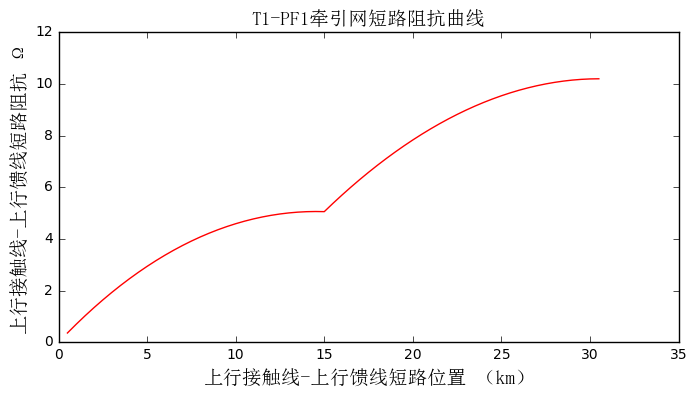

In [1]:
#三种合并模式下，接触线T1-钢轨R1、接触线T1-馈线PF1、钢轨R1-馈线PF1短路阻抗曲线
import Ipynb_importer
import new_topology as tp
import conductor_calculation as cc
import calculation as ca
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
from matplotlib.font_manager import FontProperties

######

class ChainNetwork_shortc_circuit:

    def __init__(self,

                 name="",

                 delta_length=0.5,  # 基本分段长度（km）

                 m=6,  # 归并后的导线数                       ((需要配合impel——ui改动））

                 topology=tp.Topology(),  # 供电网络拓扑结构数据 ((改变数据库时改动））

                 conductor_calculation=cc.conductor_calculation(),

                 chain_network = ca.ChainNetwork()

                 ):

        self.name = name

        self.topology = topology

        self.conductor_calculation = conductor_calculation

        self.chain_network = chain_network

        self.m = m

        self.section_length = self.topology.section_length  # 供电臂总长度

        self.delta_length = delta_length  # 基本分段长度

        self.n = int(np.round(self.section_length / self.delta_length) + 1)  # 分割面数，即网络节点数

        self.distances = self.__set_distances()  # 分割点位置距离

        self.segment_lengths = self.__set_segment_lengths()

        self.V_T1_R1 = []

        self.I_T1_R1 = []

        self.V_T1_PF1 = []

        self.I_T1_PF1 = []

        self.Z_T1_R1 = []

        self.Z_T1_PF1 = []

    def reset(self, m=6, delta_length=0.5, dbfile="calculate_system.db"):

        topology = tp.Topology()  # 读取topology信息

        conducutor_calculation = cc.conductor_calculation()

        chain_network = ca.ChainNetwork()

        self.topology = topology
        self.topology.reset_topology()
        self.topology.set_topology(dbfile)

        self.conductor_calculation = conducutor_calculation
        self.conductor_calculation.set_data(dbfile)

        self.chain_network = chain_network
        self.chain_network.reset(1, m, delta_length, dbfile)

        self.dbfile = dbfile
        self.m = m
        self.delta_length = delta_length
        self.n = int(np.round(self.section_length / self.delta_length) + 1)  # 分割面数，即网络节点数
        self.distances = self.__set_distances()  # 分割点位置距离
        self.segment_lengths = self.__set_segment_lengths()

        self.V_T1_R1 = []

        self.I_T1_R1 = []

        self.V_T1_PF1 = []

        self.I_T1_PF1 = []

        self.Z_T1_R1 = []

        self.Z_T1_PF1 = []

    def __set_distances(self):

        distances = np.arange(0, self.n, 1) * self.delta_length

        distances[self.n - 1] = self.section_length

        return distances

    def __set_segment_lengths(self):

        segment_lengths = np.zeros(self.n - 1, np.float64)

        segment_lengths[:self.n - 1] = self.distances[1:self.n] - self.distances[0:self.n - 1]  # 分割段长度 （km）

        return segment_lengths


    def plotting_short_circuit_curve(self, series_mode="上行接触线T1-上行钢轨R1"):

        if self.m == 6:
            if series_mode == "上行接触线T1-上行钢轨R1":
                for i in range(1,self.n):
                    self.chain_network.reset(1, self.m, self.delta_length, self.dbfile)
                    self.chain_network.set_z_y()
                    if self.chain_network.m == 6 or self.chain_network.m == 10:
                        self.chain_network.add_y_AT()
                    self.chain_network.add_y_AT()
                    YY1 = self.chain_network.add_y_source
                    self.chain_network.add_y()
                    R1 = self.chain_network.source()
                    self.chain_network.y[i,0,0] = self.chain_network.y[i,0,0] + 10**8
                    self.chain_network.y[i,2,2] = self.chain_network.y[i,2,2] + 10**8
                    self.chain_network.y[i,2,0] = self.chain_network.y[i,2,0] - 10**8
                    self.chain_network.y[i,0,2] = self.chain_network.y[i,0,2] - 10**8
                    UU1,II1 = self.chain_network.solution()
                    self.V_T1_R1.append(UU1[0][0]-UU1[1][0])
                    self.I_T1_R1.append(II1[0][0]+II1[3][0])
                for i in range(0,self.n-1):
                    self.Z_T1_R1.append(abs(self.V_T1_R1[i]/self.I_T1_R1[i]))
                print(self.Z_T1_R1)

                y = self.Z_T1_R1
                print(len(y))
                print(self.chain_network.delta_length)
                x = []
                for i in range(1,self.n):
                    x.append(i*self.chain_network.delta_length)
                import matplotlib.pyplot as plt
                from matplotlib.font_manager import FontProperties
                font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
                plt.xlabel('上行接触线对地短路位置 （km）',fontproperties=font_set)
                plt.ylabel('上行接触线对地短路阻抗 Ω',fontproperties=font_set)
                plt.title('上下接触线T1-上行钢轨R1牵引网短路阻抗曲线',fontproperties=font_set)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.plot(x,y,color='red')
                plt.show()
            elif series_mode == "上行接触线T1-上行馈线PF1":
                for i in range(1,self.n):
                    self.chain_network.reset(1, self.m, self.delta_length, self.dbfile)
                    self.chain_network.set_z_y()
                    if self.chain_network.m == 6 or self.chain_network.m == 10:
                        self.chain_network.add_y_AT()
                    self.chain_network.add_y_AT()
                    YY1 = self.chain_network.add_y_source
                    self.chain_network.add_y()
                    R1 = self.chain_network.source()
                    self.chain_network.y[i,0,0] = self.chain_network.y[i,0,0] + 10**8
                    self.chain_network.y[i,1,1] = self.chain_network.y[i,1,1] + 10**8
                    self.chain_network.y[i,1,0] = self.chain_network.y[i,1,0] - 10**8
                    self.chain_network.y[i,0,1] = self.chain_network.y[i,0,1] - 10**8
                    UU1,II1 = self.chain_network.solution()
                    self.V_T1_PF1.append(UU1[0][0]-UU1[1][0])
                    self.I_T1_PF1.append(II1[0][0]+II1[3][0])
                for i in range(0,self.n-1):
                    self.Z_T1_PF1.append(abs(self.V_T1_PF1[i]/self.I_T1_PF1[i]))
                print(self.Z_T1_PF1)
                import matplotlib.pyplot as plt
                from matplotlib.font_manager import FontProperties
                y = self.Z_T1_PF1
                print(len(y))
                print(self.chain_network.delta_length)
                x = []
                for i in range(1, self.n):
                    x.append(i*self.chain_network.delta_length)
                font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
                plt.xlabel('上行接触线-上行馈线短路位置 （km）',fontproperties=font_set)
                plt.ylabel('上行接触线-上行馈线短路阻抗 Ω',fontproperties=font_set)
                plt.title('上行接触线T1-上行馈线PF1牵引网短路阻抗曲线',fontproperties=font_set)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.plot(x,y,color='red')
                plt.show()
        if self.m == 10:
            if series_mode == "上行接触线T1-上行钢轨R1":
                for i in range(1,self.n):
                    self.chain_network.reset(1, self.m, self.delta_length, self.dbfile)
                    self.chain_network.set_z_y()
                    if self.chain_network.m == 6 or self.chain_network.m == 10:
                        self.chain_network.add_y_AT()
                    self.chain_network.add_y_AT()
                    YY1 = self.chain_network.add_y_source
                    self.chain_network.add_y()
                    R1 = self.chain_network.source()
                    self.chain_network.y[i,0,0] = self.chain_network.y[i,0,0] + 10**8
                    self.chain_network.y[i,2,2] = self.chain_network.y[i,2,2] + 10**8
                    self.chain_network.y[i,2,0] = self.chain_network.y[i,2,0] - 10**8
                    self.chain_network.y[i,0,2] = self.chain_network.y[i,0,2] - 10**8
                    UU1,II1 = self.chain_network.solution()
                    self.V_T1_R1.append(UU1[0][0]-UU1[1][0])
                    self.I_T1_R1.append(II1[0][0]+II1[3][0])
                for i in range(0,self.n-1):
                    self.Z_T1_R1.append(abs(self.V_T1_R1[i]/self.I_T1_R1[i]))
                print(self.Z_T1_R1)
                import matplotlib.pyplot as plt
                from matplotlib.font_manager import FontProperties
                y = self.Z_T1_R1
                print(len(y))
                print(self.chain_network.delta_length)
                x = []
                for i in range(1,self.n):
                    x.append(i*self.chain_network.delta_length)
                font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
                plt.xlabel('上行接触线对地短路位置 （km）',fontproperties=font_set)
                plt.ylabel('上行接触线对地短路阻抗 Ω',fontproperties=font_set)
                plt.title('上行接触线T1-上行钢轨R1牵引网短路阻抗曲线',fontproperties=font_set)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.plot(x,y,color='red')
                plt.show()
            elif series_mode == "上行接触线T1-上行馈线PF1":
                for i in range(1,self.n):
                    self.chain_network.reset(1, self.m, self.delta_length, self.dbfile)
                    self.chain_network.set_z_y()
                    if self.chain_network.m == 6 or self.chain_network.m == 10:
                        self.chain_network.add_y_AT()
                    self.chain_network.add_y_AT()
                    YY1 = self.chain_network.add_y_source
                    self.chain_network.add_y()
                    R1 = self.chain_network.source()
                    self.chain_network.y[i,0,0] = self.chain_network.y[i,0,0] + 10**8
                    self.chain_network.y[i,1,1] = self.chain_network.y[i,1,1] + 10**8
                    self.chain_network.y[i,1,0] = self.chain_network.y[i,1,0] - 10**8
                    self.chain_network.y[i,0,1] = self.chain_network.y[i,0,1] - 10**8
                    UU1,II1 = self.chain_network.solution()
                    self.V_T1_PF1.append(UU1[0][0]-UU1[1][0])
                    self.I_T1_PF1.append(II1[0][0]+II1[3][0])
                for i in range(0,self.n-1):
                    self.Z_T1_PF1.append(abs(self.V_T1_PF1[i]/self.I_T1_PF1[i]))
                print(self.Z_T1_PF1)
                import matplotlib.pyplot as plt
                from matplotlib.font_manager import FontProperties
                y = self.Z_T1_PF1
                print(len(y))
                print(self.chain_network.delta_length)
                x = []
                for i in range(1,self.n):
                    x.append(i*self.chain_network.delta_length)
                font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
                plt.xlabel('上行接触线-上行馈线短路位置 （km）',fontproperties=font_set)
                plt.ylabel('上行接触线-上行馈线短路阻抗 Ω',fontproperties=font_set)
                plt.title('上行接触线T1-上行馈线PF1牵引网短路阻抗曲线',fontproperties=font_set)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.plot(x,y,color='red')
                plt.show()
        if self.m == 4:
            if series_mode == "上行接触线T1-上行钢轨R1":
                for i in range(1,self.n):
                    self.chain_network.reset(1, self.m, self.delta_length, self.dbfile)
                    self.chain_network.set_z_y()
                    if self.chain_network.m == 6 or self.chain_network.m == 10:
                        self.chain_network.add_y_AT()
                    self.chain_network.add_y_AT()
                    YY1 = self.chain_network.add_y_source
                    self.chain_network.add_y()
                    R1 = self.chain_network.source()
                    self.chain_network.y[i,0,0] = self.chain_network.y[i,0,0] + 10**8
                    self.chain_network.y[i,2,2] = self.chain_network.y[i,2,2] + 10**8
                    self.chain_network.y[i,2,0] = self.chain_network.y[i,2,0] - 10**8
                    self.chain_network.y[i,0,2] = self.chain_network.y[i,0,2] - 10**8
                    UU1,II1 = self.chain_network.solution()
                    self.V_T1_R1.append(UU1[0][0]-UU1[1][0])
                    self.I_T1_R1.append(II1[0][0]+II1[3][0])
                for i in range(0,self.n-1):
                    self.Z_T1_R1.append(abs(self.V_T1_R1[i]/self.I_T1_R1[i]))
                print(self.Z_T1_R1)
                import matplotlib.pyplot as plt
                from matplotlib.font_manager import FontProperties
                y = self.Z_T1_R1
                print(len(y))
                print(self.chain_network.delta_length)
                x = []
                for i in range(1,self.n):
                    x.append(i*self.chain_network.delta_length)
                font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
                plt.xlabel('上行接触线对地短路位置 （km）',fontproperties=font_set)
                plt.ylabel('上行接触线对地短路阻抗 Ω',fontproperties=font_set)
                plt.title('上行接触线T1-上行钢轨R1牵引网短路阻抗曲线',fontproperties=font_set)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.rcParams['figure.figsize']=(8.0,4.0)
                plt.plot(x,y,color='red')
                plt.show()

# if __name__ == '__main__':

#     wei = ChainNetwork_shortc_circuit()

#     wei.reset(6, 0.5, "calculate_system.db")

#     wei.plotting_short_circuit_curve(series_mode="上行接触线-上行钢轨")
#     wei.plotting_short_circuit_curve(series_mode="上行接触线-上行馈线")
